# Automation of NRT8000 OSA
## Requires pyvisa 
Start NRT-8000 SCPI Server and fetch the IP Address generated

In [7]:
# Import required libraries
import pyvisa
import matplotlib.pyplot as plt
import numpy as np

rm = pyvisa.ResourceManager()

In [8]:
nrt = rm.open_resource("TCPIP::10.21.1.198::5025::SOCKET",read_termination="\r\n") # Change the TCPIP address
nrt.timeout=10000  #Timeout changed to 10 sec to account for slow transfer (Takes about 3 sec)


In [9]:
nrt.write(":SENSE:BANDWIDTH:RESOLUTION 3G")  #Sets RWB to 3 GHz
nrt.write(":CALCULATE:AUTO OFF") # Turning off calculation such as WDM/OSNR
nrt.write(":INITIATE")
xs = nrt.query_ascii_values(":TRACE:X? TRA")
ys = nrt.query_ascii_values(":TRACE:Y? TRA")


In [10]:
# Command to find the peak wavelength
print(np.argmax(ys))
print(xs[np.argmax(ys)])


2405
1546.148


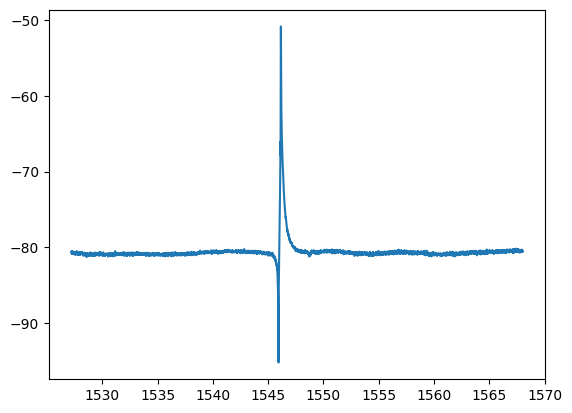

In [11]:
# plot of the system
plt.plot(xs,ys)

In [12]:
rm.close()